In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 420.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [ ]:
from pycaret.time_series import *
import pandas as pd

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Lectura del File</strong></p>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta_datos = '/content/drive/My Drive/reporte_para_serie_temporal.xlsx'

In [ ]:
# Leer el archivo Excel y establecer la columna 'Fecha' como índice
df = pd.read_excel(ruta_datos, index_col="Fecha")


In [ ]:
df.shape

(823, 1)

In [ ]:
df.head()

,Acumulado
Fecha,
2022-05-30,804.379345
2022-05-31,723.422832
2022-06-01,620.563147
2022-06-02,332.105054
2022-06-03,382.232056


In [ ]:
print(df.dtypes)

Acumulado    float64
dtype: object


In [ ]:
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
ts_setup = setup(data=df,
                 target='Acumulado',
                 seasonal_period=365)


,Description,Value
0,session_id,2477
1,Target,Acumulado
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(823, 1)"
5,Transformed data shape,"(823, 1)"
6,Transformed train set shape,"(822, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
best_model = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.5863,0.4374,146.4747,146.4747,0.1607,0.1824,0.1467
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6813,0.5083,170.2322,170.2322,0.1841,0.2150,0.1967
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.7285,0.5435,181.9998,181.9998,0.2049,0.2331,0.1267
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.7504,0.5598,187.5088,187.5088,0.2201,0.2602,0.3533
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.7522,0.5612,187.9587,187.9587,0.2344,0.2725,0.2800
exp_smooth,Exponential Smoothing,0.7543,0.5627,188.4528,188.4528,0.2085,0.2416,0.0800
croston,Croston,0.7941,0.5924,198.3931,198.3931,0.2138,0.2564,0.0500
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.8095,0.6039,202.2462,202.2462,0.2235,0.2659,0.2033
ets,ETS,0.8116,0.6055,202.7729,202.7729,0.2223,0.2632,0.1400
polytrend,Polynomial Trend Forecaster,0.8409,0.6274,210.1066,210.1066,0.2213,0.2745,0.0333


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Generar el mejor modelo 1</strong></p>

In [ ]:
ada_cds_dt_model = create_model('ada_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2024-08-25,0.1726,0.1287,43.1134,43.1134,0.0756,0.0786
1,2024-08-26,0.2720,0.2030,67.9927,67.9927,0.0950,0.0997
2,2024-08-27,1.3142,0.9805,328.3180,328.3180,0.3114,0.3688
Mean,NaT,0.5863,0.4374,146.4747,146.4747,0.1607,0.1824
SD,NaT,0.5163,0.3852,128.9831,128.9831,0.1069,0.1321


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
plot_model (ada_cds_dt_model)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
predicciones_30_ada = predict_model(ada_cds_dt_model, fh=30)

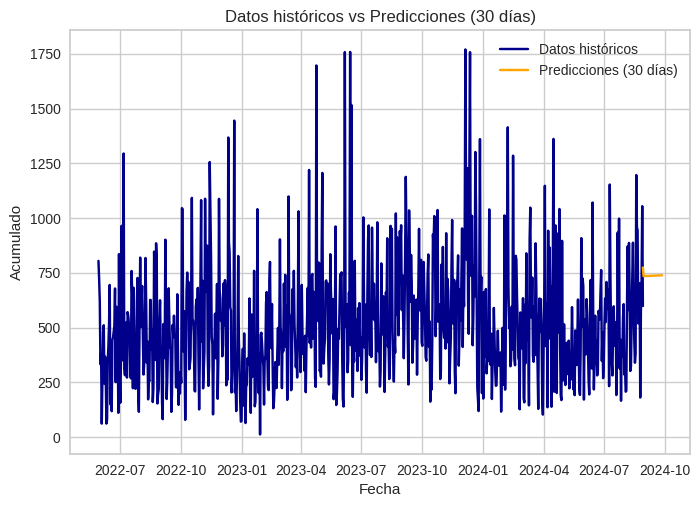

In [ ]:
# Graficar los datos históricos
plt.plot(df.index, df['Acumulado'], label='Datos históricos', color='darkblue')

# Graficar las predicciones (si 'predicciones_30' tiene las fechas como índice)
plt.plot(predicciones_30_ada.index, predicciones_30_ada['y_pred'], label='Predicciones (30 días)', color='orange')

# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Acumulado')
plt.title('Datos históricos vs Predicciones (30 días)')

# Añadir leyenda
plt.legend()

# Mostrar gráfico
plt.show()

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Generar el mejor modelo 2</strong></p>

In [ ]:
xgboost_cds_dt_model = create_model('xgboost_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2024-08-25,0.0426,0.0317,10.6306,10.6306,0.0186,0.0188
1,2024-08-26,0.5301,0.3955,132.4946,132.4946,0.1851,0.2039
2,2024-08-27,1.4713,1.0977,367.5713,367.5713,0.3486,0.4222
Mean,NaT,0.6813,0.5083,170.2322,170.2322,0.1841,0.2150
SD,NaT,0.5930,0.4424,148.1435,148.1435,0.1347,0.1649


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
plot_model (xgboost_cds_dt_model)

In [ ]:
predicciones_30_xgboost = predict_model(xgboost_cds_dt_model, fh=30)

In [ ]:
print(predicciones_30_xgboost)

              y_pred
2024-08-29  637.9430
2024-08-30  446.0151
2024-08-31  459.1882
2024-09-01  480.8063
2024-09-02  772.6131
2024-09-03  644.6797
2024-09-04  611.8718
2024-09-05  473.0703
2024-09-06  554.7478
2024-09-07  514.8214
2024-09-08  547.4397
2024-09-09  779.6132
2024-09-10  696.7578
2024-09-11  408.3366
2024-09-12  572.8408
2024-09-13  345.8641
2024-09-14  312.1524
2024-09-15  373.4574
2024-09-16  610.8372
2024-09-17  694.8126
2024-09-18  570.5990
2024-09-19  597.5537
2024-09-20  594.9663
2024-09-21  765.3700
2024-09-22  766.0048
2024-09-23  766.1377
2024-09-24  766.2707
2024-09-25  766.4036
2024-09-26  766.5365
2024-09-27  766.6694


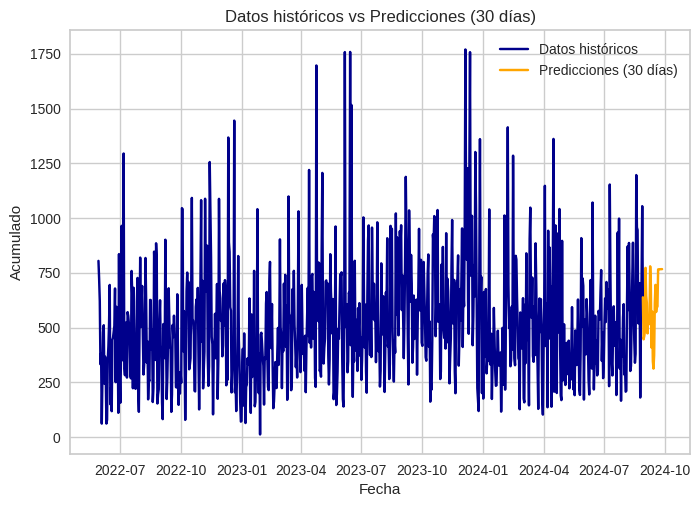

In [ ]:
# Graficar los datos históricos
plt.plot(df.index, df['Acumulado'], label='Datos históricos', color='darkblue')

# Graficar las predicciones (si 'predicciones_30' tiene las fechas como índice)
plt.plot(predicciones_30_xgboost.index, predicciones_30_xgboost['y_pred'], label='Predicciones (30 días)', color='orange')

# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Acumulado')
plt.title('Datos históricos vs Predicciones (30 días)')

# Añadir leyenda
plt.legend()

# Mostrar gráfico
plt.show()

In [ ]:
predicciones_60_xgboost = predict_model(xgboost_cds_dt_model, fh=60)

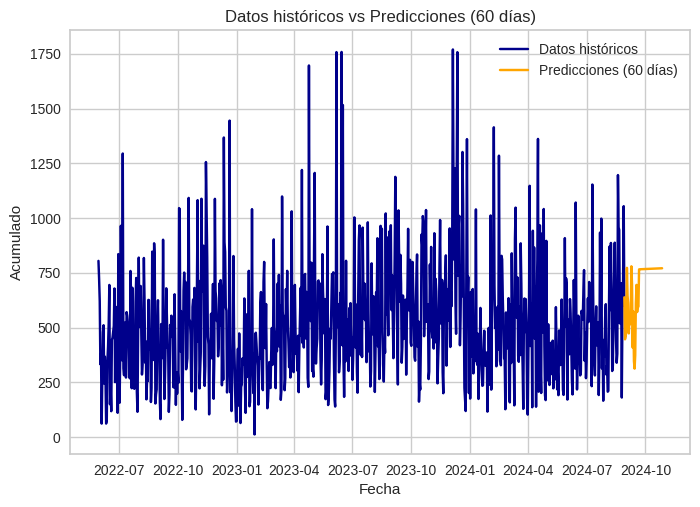

In [ ]:
# Graficar los datos históricos
plt.plot(df.index, df['Acumulado'], label='Datos históricos', color='darkblue')

# Graficar las predicciones (si 'predicciones_30' tiene las fechas como índice)
plt.plot(predicciones_60_xgboost.index, predicciones_60_xgboost['y_pred'], label='Predicciones (60 días)', color='orange')

# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Acumulado')
plt.title('Datos históricos vs Predicciones (60 días)')

# Añadir leyenda
plt.legend()

# Mostrar gráfico
plt.show()

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Empaquetar Modelo</strong></p>

In [ ]:
final_xgboost_cds_dt_model = finalize_model(xgboost_cds_dt_model)

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Predecir con el modelo Empaquetado</strong></p>

In [ ]:
predicciones_30_xgboost_final = predict_model(final_xgboost_cds_dt_model, fh=30)

In [ ]:
print(predicciones_30_xgboost_final)

              y_pred
2024-08-30  639.8123
2024-08-31  463.1267
2024-09-01  546.3668
2024-09-02  830.1943
2024-09-03  681.4808
2024-09-04  638.1947
2024-09-05  619.0690
2024-09-06  636.2629
2024-09-07  619.3353
2024-09-08  636.5292
2024-09-09  619.6016
2024-09-10  636.7955
2024-09-11  619.8679
2024-09-12  637.0618
2024-09-13  620.1342
2024-09-14  637.3281
2024-09-15  620.4005
2024-09-16  637.5944
2024-09-17  620.6668
2024-09-18  637.8607
2024-09-19  620.9331
2024-09-20  638.1270
2024-09-21  621.1994
2024-09-22  638.3932
2024-09-23  621.4657
2024-09-24  638.6595
2024-09-25  621.7320
2024-09-26  638.9258
2024-09-27  621.9983
2024-09-28  639.1921


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Salvar Modelo</strong></p>

In [ ]:
save_model(final_xgboost_cds_dt_model,'/content/drive/My Drive/final_xgboost_cds_dt_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [1]},
                                                                                                                                                                                    n_jobs=1)],
                                                                                                                                                     regressor=XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              col

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Cargar Modelo</strong></p>

In [ ]:
final_xgboost_cds_dt_model_loaded = load_model('/content/drive/My Drive/final_xgboost_cds_dt_model')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
predicciones_30_xgboost_final = predict_model(final_xgboost_cds_dt_model_loaded, fh=30)

In [ ]:
print (predicciones_30_xgboost_final.dtypes)

y_pred    float64
dtype: object


In [ ]:
print(type(predicciones_30_xgboost_final.index))

<class 'pandas.core.indexes.period.PeriodIndex'>


In [ ]:
predicciones_30_xgboost_final.index = predicciones_30_xgboost_final.index.to_timestamp()

In [ ]:
print(type(predicciones_30_xgboost_final.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
print(predicciones_30_xgboost_final)

              y_pred
2024-08-30  639.8123
2024-08-31  463.1267
2024-09-01  546.3668
2024-09-02  830.1943
2024-09-03  681.4808
2024-09-04  638.1947
2024-09-05  619.0690
2024-09-06  636.2629
2024-09-07  619.3353
2024-09-08  636.5292
2024-09-09  619.6016
2024-09-10  636.7955
2024-09-11  619.8679
2024-09-12  637.0618
2024-09-13  620.1342
2024-09-14  637.3281
2024-09-15  620.4005
2024-09-16  637.5944
2024-09-17  620.6668
2024-09-18  637.8607
2024-09-19  620.9331
2024-09-20  638.1270
2024-09-21  621.1994
2024-09-22  638.3932
2024-09-23  621.4657
2024-09-24  638.6595
2024-09-25  621.7320
2024-09-26  638.9258
2024-09-27  621.9983
2024-09-28  639.1921


In [ ]:
import matplotlib.pyplot as plt

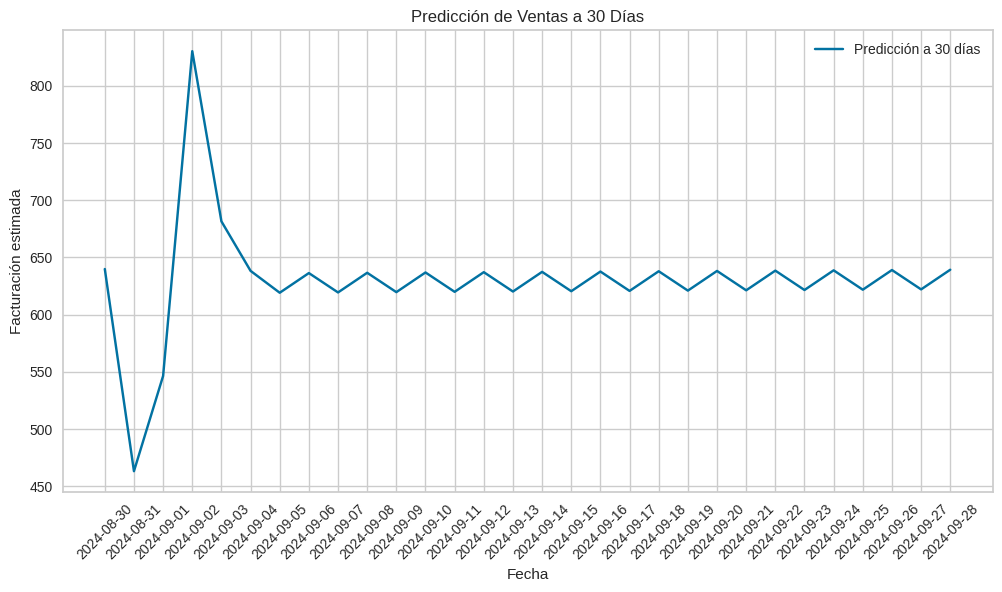

In [ ]:
# Configurar la figura
plt.figure(figsize=(12, 6))

# Graficar las predicciones
plt.plot(predicciones_30_xgboost_final, label='Predicción a 30 días')

# Título y etiquetas de los ejes
plt.title('Predicción de Ventas a 30 Días')
plt.xlabel('Fecha')
plt.ylabel('Facturación estimada')

# Personalizar las etiquetas del eje X para que aparezcan todas las fechas
plt.xticks(ticks=predicciones_30_xgboost_final.index, labels=predicciones_30_xgboost_final.index.strftime('%Y-%m-%d'), rotation=45)

# Agregar leyenda y cuadrícula
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

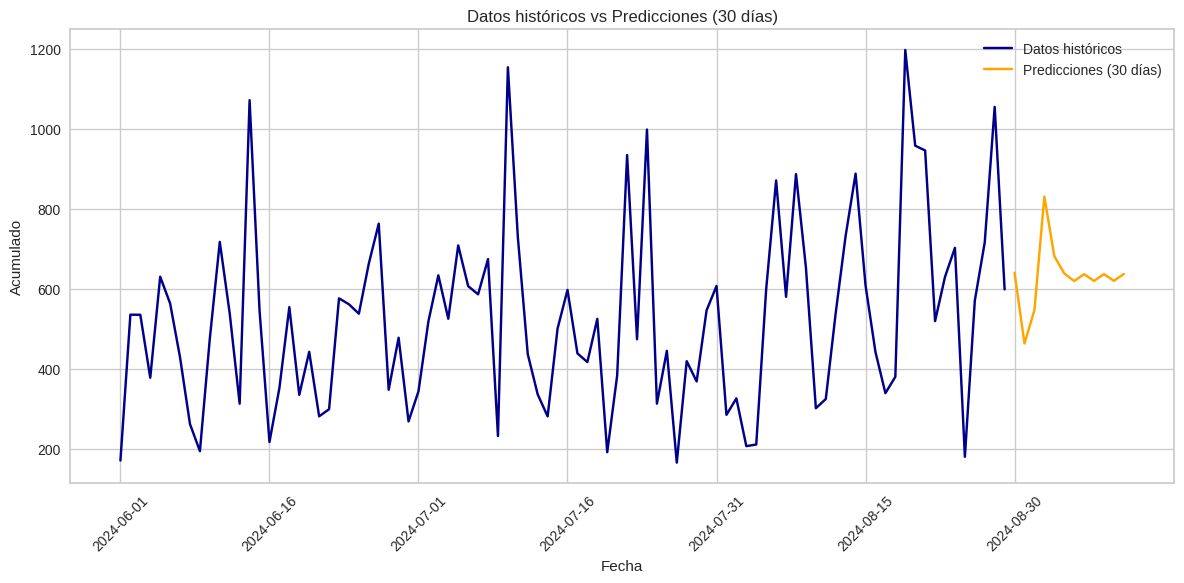

In [ ]:
# Definir el rango de fechas
fecha_inicio = '2024-06-01'
fecha_fin = '2024-09-10'

# Filtrar los datos históricos y las predicciones en el rango de fechas
df_filtrado = df.loc[fecha_inicio:fecha_fin]
predicciones_filtradas = predicciones_30_xgboost_final.loc[fecha_inicio:fecha_fin]

# Visualización
plt.figure(figsize=(12, 6))

# Graficar los datos históricos
plt.plot(df_filtrado.index, df_filtrado['Acumulado'], label='Datos históricos', color='darkblue')

# Graficar las predicciones
plt.plot(predicciones_filtradas.index, predicciones_filtradas['y_pred'], label='Predicciones (30 días)', color='orange')

# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Acumulado')
plt.title('Datos históricos vs Predicciones (30 días)')

# Ajustar el eje x para mostrar todas las fechas
plt.xticks(pd.date_range(start=fecha_inicio, end=fecha_fin, freq='15D'), rotation=45)

# Añadir leyenda
plt.legend()

# Mostrar gráfico
plt.grid(True)  # Añadir cuadrícula para mejor visualización
plt.tight_layout()  # Ajustar el espaciado
plt.show()

In [ ]:
predicciones_15_xgboost_final = predict_model(final_xgboost_cds_dt_model_loaded, fh=15)

In [ ]:
print(predicciones_15_xgboost_final)

              y_pred
2024-08-30  639.8123
2024-08-31  463.1267
2024-09-01  546.3668
2024-09-02  830.1943
2024-09-03  681.4808
2024-09-04  638.1947
2024-09-05  619.0690
2024-09-06  636.2629
2024-09-07  619.3353
2024-09-08  636.5292
2024-09-09  619.6016
2024-09-10  636.7955
2024-09-11  619.8679
2024-09-12  637.0618
2024-09-13  620.1342


In [ ]:
# Convertir índice 'Period' a 'Datetime'
predicciones_15_xgboost_final.index = predicciones_15_xgboost_final.index.to_timestamp()

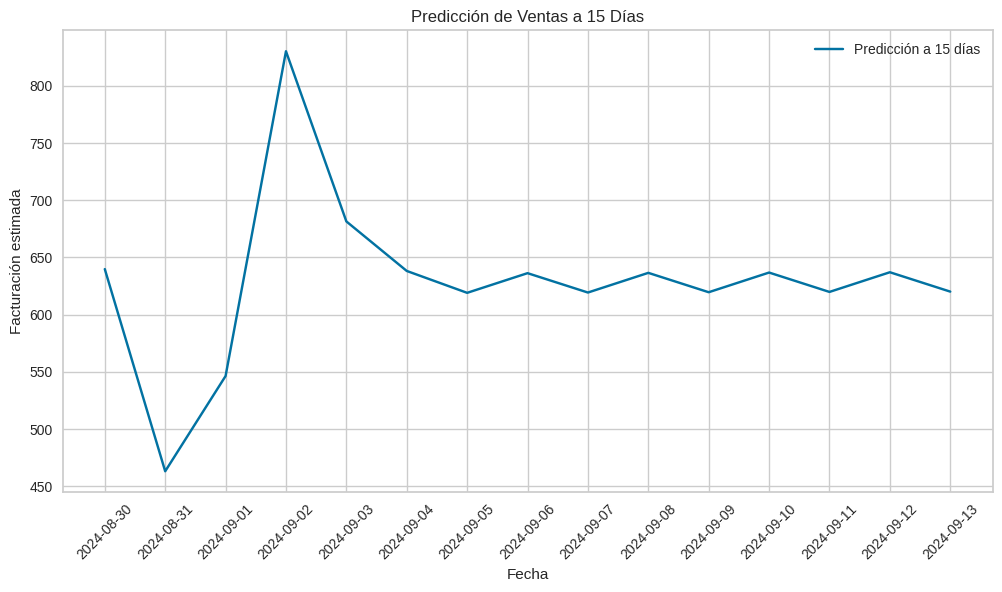

In [ ]:
# Configurar la figura
plt.figure(figsize=(12, 6))

# Graficar las predicciones
plt.plot(predicciones_15_xgboost_final, label='Predicción a 15 días')

# Título y etiquetas de los ejes
plt.title('Predicción de Ventas a 15 Días')
plt.xlabel('Fecha')
plt.ylabel('Facturación estimada')

# Personalizar las etiquetas del eje X para que aparezcan todas las fechas
plt.xticks(ticks=predicciones_15_xgboost_final.index, labels=predicciones_15_xgboost_final.index.strftime('%Y-%m-%d'), rotation=45)

# Agregar leyenda y cuadrícula
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()